In [8]:
# -*- coding: utf-8 -*-

# '''
#  @author      : Zhichuan Li   
#  @mail        : lizhichuan2012@gmail.com
#  @create date : 2019-04-10
#  @Description : Source code for TSSC2019 big data challange
# '''

import csv
import pandas as pd
from sqlalchemy import create_engine

# load dataset

# total 22 signal ID
# each signal ID contains 12 csv files which represent the 12 months' data. naming:<month-number>_<signalid>
home_folder = "D:\\03_Projects\\git_repository\\datasets\\TSSC2019"
#signalid_list = [7076,7122,7123,7124,7125,7126,7127,7128,7129,7180,7181,7182,7183,7184,7185,7186,7187,7188,7189,7190,7241,7342]
# test code
signalid_list = [7076]

# import csv data to sqlite database

import sqlite3
conn = sqlite3.connect('TestDB.db')  # You can create a new database
c = conn.cursor()                    # The database will be saved in the location where your file is saved

# Create table - signal
c.execute('''CREATE TABLE SIGNAL
             ([Signal_ID] integer,[Datetime] date, [Event Code] integer, [Event Parameter] integer)''')
conn.commit()          

# corridor west contains 10 signals
west_signalid_list = [7122,7123,7124,7125,7126,7127,7128,7129,7241,7341]
# corridor east contains 12 signals
east_signalid_list = [7076,7180,7181,7182,7183,7184,7185,7186,7187,7188,7189,7190]

# read csv files to data frame

for signalid in signalid_list:
    for month in range(1,13):
        file_name = str(month) +"_" + str(signalid) + ".csv"        # 1_7076.csv ...12_7076.csv
        full_name = home_folder +"\\"+ str(signalid) + "\\"+ str(file_name)
        print(pd.read_csv(full_name, nrows=5))
        
        chunksize = 100000
        i = 0
        j = 1
        for df in pd.read_csv(full_name, chunksize=chunksize, iterator=True):
              df = pd.DataFrame({'name' : ['Signal ID', 'Datetime','Event Code','Event Parameter']})
              #df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) 
              df.index += j
              i+=1
              df.to_sql('signal_7076', csv_database, if_exists='append')
              j = df.index[-1] + 1

# select data from database
df = pd.read_sql_query('SELECT top 5 * FROM signal_7076', csv_database)
print(df)
        

   7076  2018-01-10 13:21:53.4000000  82  2
0  7076  2018-01-10 13:21:53.2000000  81  4
1  7076  2018-01-10 13:21:50.6000000  82  4
2  7076  2018-01-10 13:21:50.5000000  81  4
3  7076  2018-01-10 13:21:30.5000000  82  4
4  7076  2018-01-10 13:21:30.3000000  81  2


OperationalError: (sqlite3.OperationalError) table signal_7076 has no column named name [SQL: 'INSERT INTO signal_7076 ("index", name) VALUES (?, ?)'] [parameters: ((1, 'Signal ID'), (2, 'Datetime'), (3, 'Event Code'), (4, 'Event Parameter'))] (Background on this error at: http://sqlalche.me/e/e3q8)

In [ ]:
# Data Visulization

import matplotlib.pyplot as plt


*Data Visulization examples*
 source: https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed

In [1]:
import pandas as pd
import os

iris_folder = 'D:\\03_Projects\\git_repository\\datasets\\iris'
iris = pd.read_csv(iris_folder + '\\' + 'iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [2]:
wine_folder = 'D:\\03_Projects\\git_repository\\datasets\\wine-reviews'

wine_reviews = pd.read_csv(wine_folder+'\\'+'winemag-data-130k-v2.csv', index_col=0)
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Matplotlib

Text(0, 0.5, 'sepal_width')

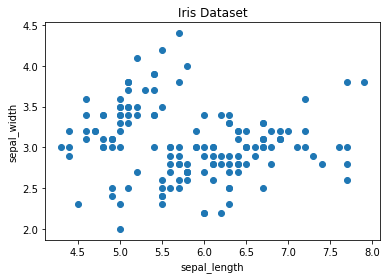

In [5]:
import matplotlib.pyplot as plt

# Scatter plot

# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(iris['sepal_length'], iris['sepal_width'])

# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')


Text(0, 0.5, 'sepal_width')

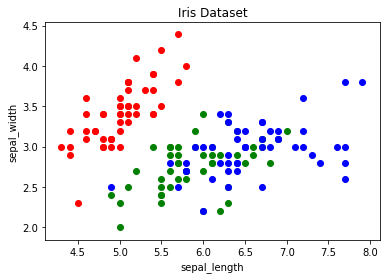

In [6]:
# create color dictionary
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['class'][i]])
    
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

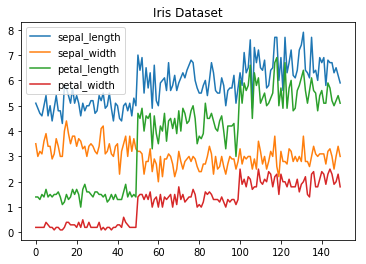

In [7]:
#Line Chart

# get columns to plot
columns = iris.columns.drop(['class'])

# create x data
x_data = range(0, iris.shape[0])

# create figure and axis
fig, ax = plt.subplots()

# plot each column
for column in columns:
    ax.plot(x_data, iris[column])
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

Text(0, 0.5, 'Frequency')

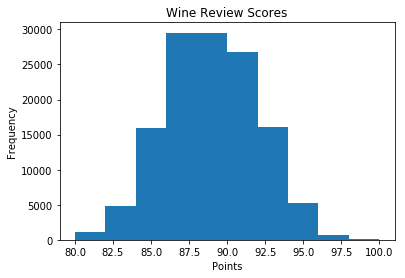

In [8]:
# Histogram

# create figure and axis
fig, ax = plt.subplots()

# plot histogram
ax.hist(wine_reviews['points'])

# set title and labels
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

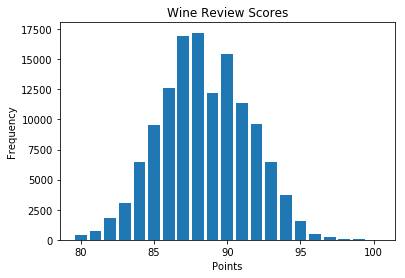

In [9]:
# Bar chart

# create a figure and axis 
fig, ax = plt.subplots() 

# count the occurrence of each class 
data = wine_reviews['points'].value_counts() 

# get x and y data 
points = data.index 
frequency = data.values 

# create bar chart 
ax.bar(points, frequency) 

# set title and labels 
ax.set_title('Wine Review Scores') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

# Pandas Visualization

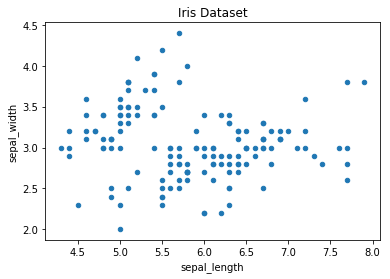

In [10]:
# scatter plot
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset')

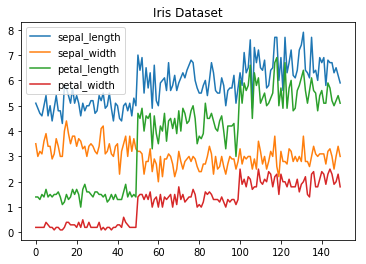

In [11]:
#line chart
iris.drop(['class'], axis=1).plot.line(title='Iris Dataset')

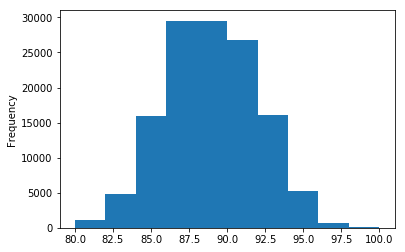

In [12]:
# Histogram
wine_reviews['points'].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FECCF002E8>,
      dtype=object)

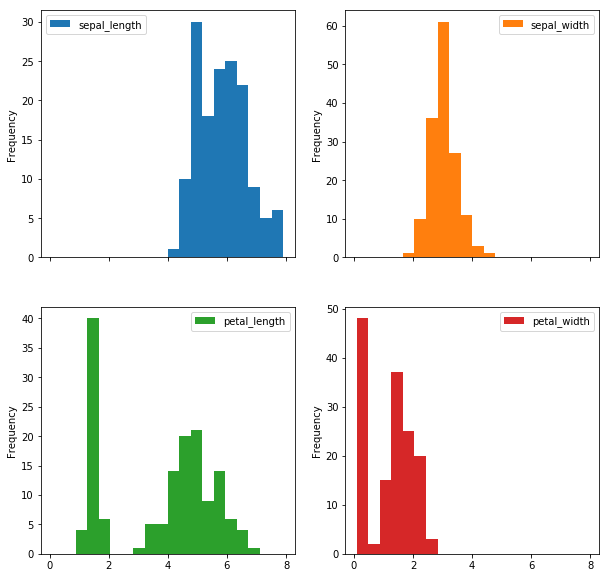

In [13]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

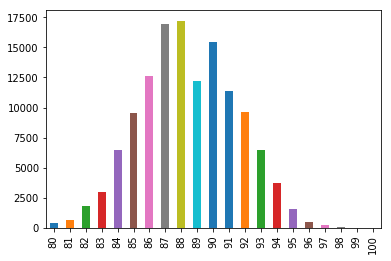

In [14]:
# Bar chart
wine_reviews['points'].value_counts().sort_index().plot.bar()